# Homework 0

## Problem 1

1. Gradient of Lagrangian

Gradient of Lagrangian is $A^T(Ax-b)+2\lambda x$

(A column vector $\in \mathbb{R}^n$)

2. Unconstrained least square

$(A^TA)^{-1}A^Tb$ (if $A^TA$ is invertible)

3.a

$x=h(\lambda)=(A^TA + 2\lambda)^{-1}A^Tb$ (if $A^TA+ 2\lambda$ is invertible)

3.b

For every $A\in\mathbb{R}^{m+n}$, we can do SVD $A=UDV^T$, thus $A^TA=UD^2U^T$.

Then $h(\lambda)=U(D^2+2\lambda)^{-1}U^TA^Tb$

$h^T(\lambda)h(\lambda)=b^TAU(D^2+2\lambda)^{-2}U^TA^Tb$

When $\lambda \ge 0$ and $A^TA$ is invertible, diagonal of $(D^2+2\lambda)^{-3}$ are all positive. Since $x^Tx=\epsilon > 0$, then $A^Tb=A^TAx \neq 0$. So

$\frac{\partial}{\partial{\lambda}}h^T(\lambda)h(\lambda)=-4b^TAU(D^2+2\lambda)^{-3}U^TA^Tb=-4||(D^2+2\lambda)^{-1.5}U^TA^Tb||^2_2 < 0$ ($(D^2+2\lambda)^{-1.5}U^T$ is invertible), so $h(\lambda)$ is monotonically decreasing.

4. Implement

In [4]:
import numpy as np
npz = np.load('HW0_P1.npz')
A = npz['A']
b = npz['b']
eps = npz['eps']
A.shape, A.dtype, b.shape, b.dtype 

((100, 30), dtype('float64'), (100,), dtype('float64'))

In [5]:
print(eps)

def h(lamda,A,b):
    # note that mat+num means adding to all element in numpy
    return np.linalg.inv(A.T@A+2*lamda*np.identity(A.shape[1]))@A.T@b

def solve(A, b, eps):
    # unconstrained solution
    if np.sum(h(0,A,b)**2) < eps:
        return h(0,A,b)

    # constrained solution
    # first find a interval for lambda
    lo = 0
    hi = 1
    while np.sum(h(hi,A,b)**2) > eps:
        hi = 2*hi

    # then line search
    max_iter = 10000
    max_error = 1e-6
    for _ in range(max_iter):
        mi = (lo+hi)/2
        if hi - lo < 2 * max_error:
            return h(mi,A,b)
        if np.sum(h(mi,A,b)**2) > eps:
            lo = mi
        else: hi = mi

    print(f'iter limit reached...lambda={mi}')
    return h(mi,A,b)

0.5


In [28]:
# Evaluation code, you need to run it, but do not modify
x = solve(A,b,eps)
print('x norm square', x@x)  # x@x should be close to or less then eps
print('optimal value', ((A@x - b)**2).sum())

x norm square 0.4999999038076987
optimal value 17.22012729297939


## Problem 2

(2.1) 

1.

$F(t)=P(\frac{\beta}{\alpha+\beta}\le t)=P(\frac{\beta}{\alpha}\le\frac{t}{1-t})$ (integral is done by graph)

$=0 (t \le 0)$, or

$\frac{t}{2(1-t)} (0<t\le 0.5)$, or

$\frac{3t-1}{2t} (0.5<t<1)$, or

$1 (t>1)$

2.

The pdf $f(t)$ at P=0 is not continous ($f(0^{-})=0,f(0^{+})=0.5$). If we only consider $0^{+}$ part (since usually t is between 0 and 1), then 0.5 is a pratical choice.

pdf at P=0.5 is continous. Just take derivative of $F(t)$, then the answer is 2.

(2.2) 

1.

When AB $\perp$ AC, easy to prove P' is uniformly distributed inside the rectangular by definition, i.e. pdf is some constant.

When AB is not perpendicular to AC, there exists a linear (with full rank if AB is not parallel to AC, thus is bijective and differentiable) transformation to make them perpendicular. 

So by formula mentioned in hint, we know the pdf is also a constant. This means P' is uniformly distributed.

2.

The reflection relative to BC is also a non-trivial linear transformation, so bijective and differentiable.

So pdf of P' is constant derives pdf of P is constant.

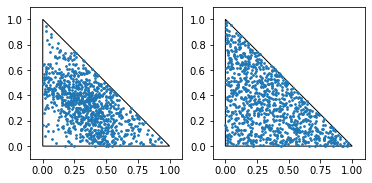

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

pts = np.array([[0,0], [0,1], [1,0]])
def draw_background(index):
    # DRAW THE TRIANGLE AS BACKGROUND
    p = Polygon(pts, closed=True, facecolor=(1,1,1,0), edgecolor=(0, 0, 0))

    plt.subplot(1, 2, index + 1)

    ax = plt.gca()
    ax.set_aspect('equal')
    ax.add_patch(p)
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)

def wrong_method(pts,sample_num):
    sample = np.random.rand(3,sample_num)
    sample /= np.sum(sample, axis=0)
    return sample.T@pts

def right_method(pts,sample_num):
    sample = np.random.rand(2,sample_num)
    p_prime = pts[0] + sample[0].reshape(-1,1)*(pts[1]-pts[0]) + sample[1].reshape(-1,1)*(pts[2]-pts[0])
    # reflection. ref:https://math.stackexchange.com/questions/1013230/how-to-find-coordinates-of-reflected-point
    x0, y0 = pts[0]
    x1, y1 = pts[1]
    x2, y2 = pts[2]
    if x1 == x2:
        coef = (x0>=0)*(p_prime[0]<0) + (x0<0)*(p_prime[0]>=0)
        px = 2*coef*(x1-p_prime[0]) + p_prime[0]
        py = p_prime[1]

    elif y1 == y2:
        coef = (y0>=0)*(p_prime[1]<0) + (y0<0)*(p_prime[1]>=0)
        py = 2*coef*(y1-p_prime[1]) + p_prime[1]
        px = p_prime[0]

    else:
        a = 1/(x2-x1)
        b = -1/(y2-y1)
        c = -x1/(x2-x1) + y1/(y2-y1)
        subin = a*p_prime[:,0]+b*p_prime[:,1]+c
        coef = (a*x0+b*y0+c>=0)*(subin<0) + (a*x0+b*y0+c<0)*(subin>=0)
        common = -2*coef*subin/(a**2+b**2)
        px = p_prime[:,0] + a*common
        py = p_prime[:,1] + b*common

    return np.stack([px,py]).T

draw_background(0)
# REPLACE THE FOLLOWING LINE USING YOUR DATA (incorrect method)
sample_pts = wrong_method(pts,1000)
plt.scatter(sample_pts[:,0], sample_pts[:,1], s=3) 

draw_background(1)
# REPLACE THE FOLLOWING LINE USING YOUR DATA (correct method)
sample_pts = right_method(pts,1000)
plt.scatter(sample_pts[:,0], sample_pts[:,1], s=3) 

plt.show()

## Problem 3

In [1]:
import numpy as np
npz = np.load("train.npz")
images = npz["images"]  # array with shape (N,Width,Height,3)
edges = npz["edges"]  # array with shape (N,Width,Height)

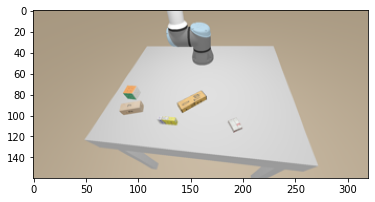

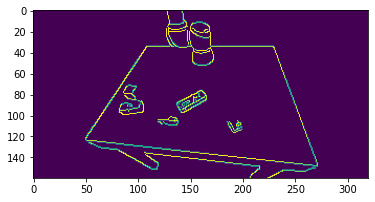

In [2]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(images[0])
plt.figure()
plt.imshow(edges[0])

In [3]:
images.shape, edges.shape, images.max(), np.unique(edges)

((1000, 160, 320, 3), (1000, 160, 320), 255, array([  0, 255], dtype=uint8))

In [4]:
# Build and train your neural network here, optionally save the weights

import torch
from torch import nn

# input shape: 160*320, channel 3
# output shape: 160*320, channel 2 (binary classification)

class microUnet(nn.Module):
    def __init__(self):
        super().__init__()
        self.reflpad = nn.ReflectionPad2d((11,11,11,11))

        self.conv1 = nn.Conv2d(3,64,kernel_size=3)
        self.conv2 = nn.Conv2d(64,128,kernel_size=3)
        self.conv3 = nn.Conv2d(128,256,kernel_size=3)
        self.conv4 = nn.Conv2d(256,128,kernel_size=3)
        self.conv5 = nn.Conv2d(128,64,kernel_size=3)
        self.conv6 = nn.Conv2d(64,2,kernel_size=3)

        self.pool = nn.MaxPool2d(2,2)
        self.dconv1 = nn.ConvTranspose2d(256,128,kernel_size=2,stride=2)
        self.dconv2 = nn.ConvTranspose2d(128,64,kernel_size=2,stride=2)

    def forward(self,x):
        x = self.reflpad(x)
        x1 = self.conv1(x)
        x2 = self.conv2(self.pool(x1))
        x3 = self.conv3(self.pool(x2))
        x4 = torch.cat((x2[:,:,2:-2,2:-2],self.dconv1(x3)),1)
        x5 = torch.cat((x1[:,:,8:-8,8:-8],self.dconv2(self.conv4(x4))),1)
        out = self.conv6(self.conv5(x5))
        return out

def check_dim():
    model = microUnet()
    x = torch.rand(10,3,160,320)
    y = model(x)
    print(y.shape)

check_dim()

torch.Size([10, 2, 160, 320])


In [5]:
# prepare data
from torch.utils.data import Dataset,DataLoader
class EdgeDateSet(Dataset):
    def __init__(self) -> None:
        super().__init__()
        self.img = torch.Tensor(images).permute(0,3,1,2) / 255
        self.edge = torch.LongTensor(edges) // 255

    def __len__(self) -> int:
        return self.img.shape[0]

    def __getitem__(self, index: int):
        return self.img[index], self.edge[index]

train_set = EdgeDateSet()
train_loader = DataLoader(train_set,16,shuffle=True)

print(train_set[0][0].shape)
print(train_set[0][1].shape)
        

torch.Size([3, 160, 320])
torch.Size([160, 320])


In [6]:
from torch.optim import Adam
def train(model, trainloader, optimizer, epoch_limit):
    model = model.to('cuda')
    for e in range(epoch_limit):
        for t, (x,y) in enumerate(trainloader):
            model.train()
            x = x.to('cuda')
            y = y.to('cuda')

            out = model(x)
            loss = nn.CrossEntropyLoss()(out,y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if t % 50 == 0:
                print('Epoch %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))

            torch.cuda.empty_cache()

In [9]:
model = microUnet()
optimizer = Adam(model.parameters(),5e-4)
train(model,train_loader,optimizer,40)
torch.save(model.state_dict(), 'model.pth')

Epoch 0, Iteration 0, loss = 0.7025
Epoch 0, Iteration 50, loss = 0.1538
Epoch 1, Iteration 0, loss = 0.1344
Epoch 1, Iteration 50, loss = 0.1254
Epoch 2, Iteration 0, loss = 0.1176
Epoch 2, Iteration 50, loss = 0.1137
Epoch 3, Iteration 0, loss = 0.1174
Epoch 3, Iteration 50, loss = 0.1025
Epoch 4, Iteration 0, loss = 0.0983
Epoch 4, Iteration 50, loss = 0.0901
Epoch 5, Iteration 0, loss = 0.0850
Epoch 5, Iteration 50, loss = 0.0696
Epoch 6, Iteration 0, loss = 0.0674
Epoch 6, Iteration 50, loss = 0.0676
Epoch 7, Iteration 0, loss = 0.0551
Epoch 7, Iteration 50, loss = 0.0570
Epoch 8, Iteration 0, loss = 0.0476
Epoch 8, Iteration 50, loss = 0.0475
Epoch 9, Iteration 0, loss = 0.0462
Epoch 9, Iteration 50, loss = 0.0347
Epoch 10, Iteration 0, loss = 0.0399
Epoch 10, Iteration 50, loss = 0.0345
Epoch 11, Iteration 0, loss = 0.0356
Epoch 11, Iteration 50, loss = 4.6726
Epoch 12, Iteration 0, loss = 0.7782
Epoch 12, Iteration 50, loss = 0.0984
Epoch 13, Iteration 0, loss = 0.0907
Epoch 13

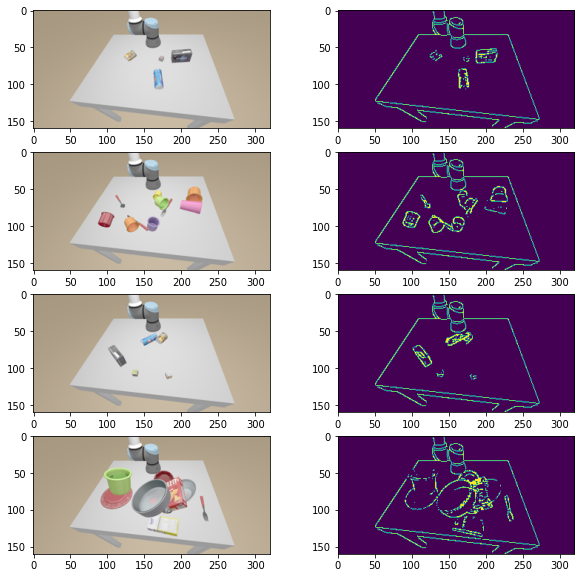

In [16]:
# Test on the testing set
import numpy as np
import matplotlib.pyplot as plt
npz = np.load("test.npz")
test_images = npz["images"]

model = model.to('cpu')

plt.figure(figsize=(10, 10))
with torch.no_grad():
    for i, img in enumerate(test_images[:4]):
        plt.subplot(4, 2, i * 2 + 1)
        plt.imshow(img)

        plt.subplot(4, 2, i * 2 + 2)
        # edge = evaluate your model on the test set, replace the following line
        img = img.reshape(1,*img.shape)


        binary_img = model(torch.Tensor(img).permute(0,3,1,2) / 255).squeeze()

        _, edge = binary_img.max(dim=0)
        edge *= 255

        plt.imshow(np.array(edge))